In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time



In [14]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [3]:
import os 
fred_key = os.getenv('FRED_API_KEY')


# Creating fred object

In [18]:
from fredapi import Fred

fred = Fred(api_key=fred_key)


# Searching for economical data

In [22]:
sp_data = fred.search('S&B', order_by='popularity')
sp_data.head()

id realtime_start realtime_end  \
series id                                                        
BAMLH0A2HYBEY        BAMLH0A2HYBEY     2024-11-30   2024-11-30   
BAMLH0A2HYB            BAMLH0A2HYB     2024-11-30   2024-11-30   
CALOSA7URN              CALOSA7URN     2024-11-30   2024-11-30   
CROASMIDTIER          CROASMIDTIER     2024-11-30   2024-11-30   
USAB6BLTT02STSAQ  USAB6BLTT02STSAQ     2024-11-30   2024-11-30   

                                                              title  \
series id                                                             
BAMLH0A2HYBEY     ICE BofA Single-B US High Yield Index Effectiv...   
BAMLH0A2HYB       ICE BofA Single-B US High Yield Index Option-A...   
CALOSA7URN              Unemployment Rate in Los Angeles County, CA   
CROASMIDTIER      AD&Co US Mortgage High Yield Index, Credit-and...   
USAB6BLTT02STSAQ  Balance of Payments: Current Account: Balance ...   

                 observation_start observation_end     frequency  \
series id                                                          
BAMLH0A2HYBEY           1996-12-31      2024-11-28  Daily, Close   
BAMLH0A2HYB             1996-12-31      2024-11-28  Daily, Close   
CALOSA7URN              1990-01-01      2024-10-01       Monthly   
CROASMIDTIER            2015-06-01      2024-10-01       Monthly   
USAB6BLTT02STSAQ        1960-01-01      2024-04-01     Quarterly   

                 frequency_short              units        units_short  \
series id                                                                
BAMLH0A2HYBEY                  D            Percent                  %   
BAMLH0A2HYB                    D            Percent                  %   
CALOSA7URN                     M            Percent                  %   
CROASMIDTIER                   M              Index              Index   
USAB6BLTT02STSAQ               Q  Percentage of GDP  Percentage of GDP   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
BAMLH0A2HYBEY     Not Seasonally Adjusted                       NSA   
BAMLH0A2HYB       Not Seasonally Adjusted                       NSA   
CALOSA7URN        Not Seasonally Adjusted                       NSA   
CROASMIDTIER      Not Seasonally Adjusted                       NSA   
USAB6BLTT02STSAQ      Seasonally Adjusted                        SA   

                               last_updated popularity  \
series id                                                
BAMLH0A2HYBEY     2024-11-29 10:59:11-06:00         67   
BAMLH0A2HYB       2024-11-29 10:59:11-06:00         63   
CALOSA7URN        2024-11-27 10:20:02-06:00         48   
CROASMIDTIER      2024-11-08 12:48:02-06:00         44   
USAB6BLTT02STSAQ  2024-10-15 14:09:04-05:00         37   

                                                              notes  
series id                                                            
BAMLH0A2HYBEY     This data represents the effective yield of th...  
BAMLH0A2HYB       This data represents the Option-Adjusted Sprea...  
CALOSA7URN        These data come from the Current Population Su...  
CROASMIDTIER      The AD&Co US Mortgage High Yield Index crOAS, ...  
USAB6BLTT02STSAQ  OECD Data Filters:  REF_AREA: USA COUNTERPART_...

## pulling and ploting raw data

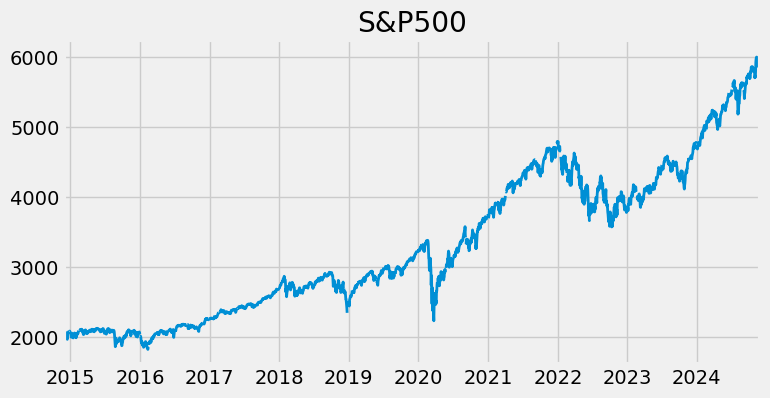

In [27]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(8,4), title='S&P500', lw=2)
plt.show()

## Joining multiple data series together

In [30]:
unemp = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp = unemp.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [31]:
unemp.head()

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2024-11-30   2024-11-30   
LNS14000006  LNS14000006     2024-11-30   2024-11-30   
U6RATE            U6RATE     2024-11-30   2024-11-30   
CAUR                CAUR     2024-11-30   2024-11-30   
TXUR                TXUR     2024-11-30   2024-11-30   

                                                         title  \
series id                                                        
UNRATE                                       Unemployment Rate   
LNS14000006      Unemployment Rate - Black or African American   
U6RATE       Total Unemployed, Plus All Persons Marginally ...   
CAUR                           Unemployment Rate in California   
TXUR                                Unemployment Rate in Texas   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
UNRATE             1948-01-01      2024-10-01   Monthly               M   
LNS14000006        1972-01-01      2024-10-01   Monthly               M   
U6RATE             1994-01-01      2024-10-01   Monthly               M   
CAUR               1976-01-01      2024-10-01   Monthly               M   
TXUR               1976-01-01      2024-10-01   Monthly               M   

               units units_short  seasonal_adjustment  \
series id                                               
UNRATE       Percent           %  Seasonally Adjusted   
LNS14000006  Percent           %  Seasonally Adjusted   
U6RATE       Percent           %  Seasonally Adjusted   
CAUR         Percent           %  Seasonally Adjusted   
TXUR         Percent           %  Seasonally Adjusted   

            seasonal_adjustment_short               last_updated popularity  \
series id                                                                     
UNRATE                             SA  2024-11-01 07:47:02-05:00         95   
LNS14000006                        SA  2024-11-01 07:47:04-05:00         72   
U6RATE                             SA  2024-11-01 07:47:08-05:00         67   
CAUR                               SA  2024-11-20 10:50:02-06:00         64   
TXUR                               SA  2024-11-20 10:49:03-06:00         56   

                                                         notes  
series id                                                       
UNRATE       The unemployment rate represents the number of...  
LNS14000006  The series comes from the 'Current Population ...  
U6RATE       The series comes from the 'Current Population ...  
CAUR                                                      None  
TXUR                                                      None

In [33]:
unemp = unemp.loc[unemp.title.str.contains('Unemployment Rate')]

In [34]:
unemp.head()

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2024-11-30   2024-11-30   
LNS14000006            LNS14000006     2024-11-30   2024-11-30   
CAUR                          CAUR     2024-11-30   2024-11-30   
TXUR                          TXUR     2024-11-30   2024-11-30   
M0892AUSM156SNBR  M0892AUSM156SNBR     2024-11-30   2024-11-30   

                                                          title  \
series id                                                         
UNRATE                                        Unemployment Rate   
LNS14000006       Unemployment Rate - Black or African American   
CAUR                            Unemployment Rate in California   
TXUR                                 Unemployment Rate in Texas   
M0892AUSM156SNBR            Unemployment Rate for United States   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2024-10-01   Monthly               M   
LNS14000006             1972-01-01      2024-10-01   Monthly               M   
CAUR                    1976-01-01      2024-10-01   Monthly               M   
TXUR                    1976-01-01      2024-10-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
TXUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2024-11-01 07:47:02-05:00   
LNS14000006                             SA  2024-11-01 07:47:04-05:00   
CAUR                                    SA  2024-11-20 10:50:02-06:00   
TXUR                                    SA  2024-11-20 10:49:03-06:00   
M0892AUSM156SNBR                        SA  2012-08-17 14:26:06-05:00   

                 popularity                                              notes  
series id                                                                       
UNRATE                   95  The unemployment rate represents the number of...  
LNS14000006              72  The series comes from the 'Current Population ...  
CAUR                     64                                               None  
TXUR                     56                                               None  
M0892AUSM156SNBR         54  Series Is Presented Here As Three Variables--(...

In [36]:
all_results = []

for myid in unemp.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)

unemp_final = pd.concat(all_results, axis=1)

In [40]:
unemp_final

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-06-01   5.2   4.0   4.2   3.3   3.4   4.4   4.1   2.9   3.2   3.6   5.0   
2024-07-01   5.2   4.1   4.3   3.3   3.4   4.5   4.4   2.8   3.5   3.7   5.2   
2024-08-01   5.3   4.1   4.4   3.3   3.4   4.5   4.5   2.8   3.7   3.8   5.3   
2024-09-01   5.3   4.1   4.4   3.3   3.4   4.5   4.5   2.9   3.8   3.8   5.3   
2024-10-01   5.4   4.1   4.4   3.3   3.4   4.3   4.7   2.9   3.9   3.7   5.3   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-06-01   4.6   3.3   3.8   3.3   2.9   2.7   4.6   3.6   3.9   2.9   3.0   
2024-07-01   4.7   3.4   3.9   3.4   3.0   2.7   4.7   3.9   4.0   3.2   3.0   
2024-08-01   4.8   3.6   4.0   3.4   2.9   2.8   4.8   4.3   4.1   3.3   3.1   
2024-09-01   4.7   3.6   4.0   3.5   2.9   2.9   4.9   4.5   4.2   3.4   3.2   
2024-10-01   4.7   3.6   4.1   3.6   2.9   2.9   5.0   4.7   4.3   3.4   3.3   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-06-01   4.8   2.8   4.1   4.1   5.2   3.3   3.4   3.7   4.5   2.8   3.0   
2024-07-01   4.9   2.8   4.1   4.2   5.4   3.3   3.5   3.8   4.5   2.8   3.2   
2024-08-01   4.8   2.9   4.0   4.2   5.5   3.3   3.4   3.9   4.6   2.9   3.3   
2024-09-01   4.8   2.9   4.0   4.2   5.6   3.3   3.4   3.9   4.5   2.9   3.5   
2024-10-01   4.7   3.0   4.0   4.2   5.7   3.3   3.3   3.8   4.6   3.0   3.5   

            PRUR  INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  MEUR  NEUR  CTUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-06-01   5.8   3.8   4.0   2.9   2.1   3.1   5.4   2.8   2.8   2.6   3.9   
2024-07-01   5.8   4.0   3.9   2.9   2.2   3.1   5.5   2.7   2.8   2.6   3.6   
2024-08-01   5.7   4.2   3.9   2.9   2.3   3.2   5.7   2.7   2.8   2.7   3.4   
2024-09-01   5.5   4.3   3.9   2.9   2.3   3.3   5.7   2.8   2.8   2.7   3.2   
2024-10-01   5.4   4.4   4.1   2.9   2.4   3.3   5.7   2.9   2.9   2.7   3.0   

            IDUR  NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN

In [39]:
cols_to_drop = []
for i in unemp_final:
    if len(i) > 4:
        cols_to_drop.append(i)
unemp_final = unemp_final.drop(columns = cols_to_drop, axis=1)

In [42]:
unemp_states = unemp_final.copy()  
unemp_states = unemp_states.dropna()
id_to_state = unemp['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

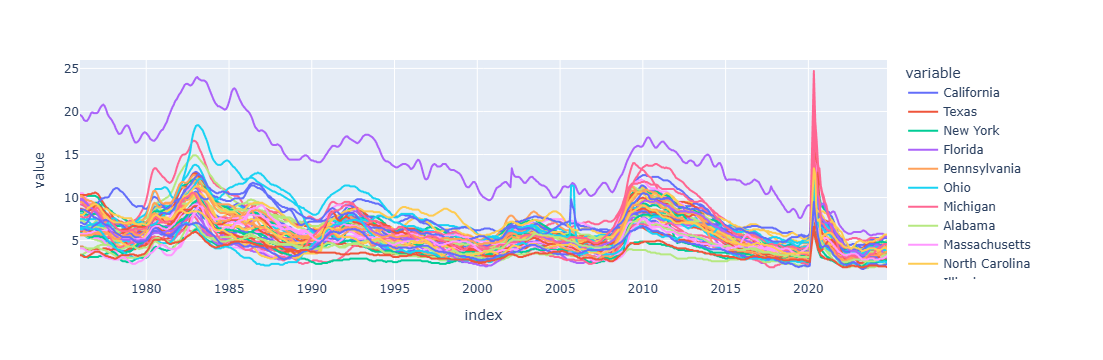

In [45]:
px.line(unemp_states)

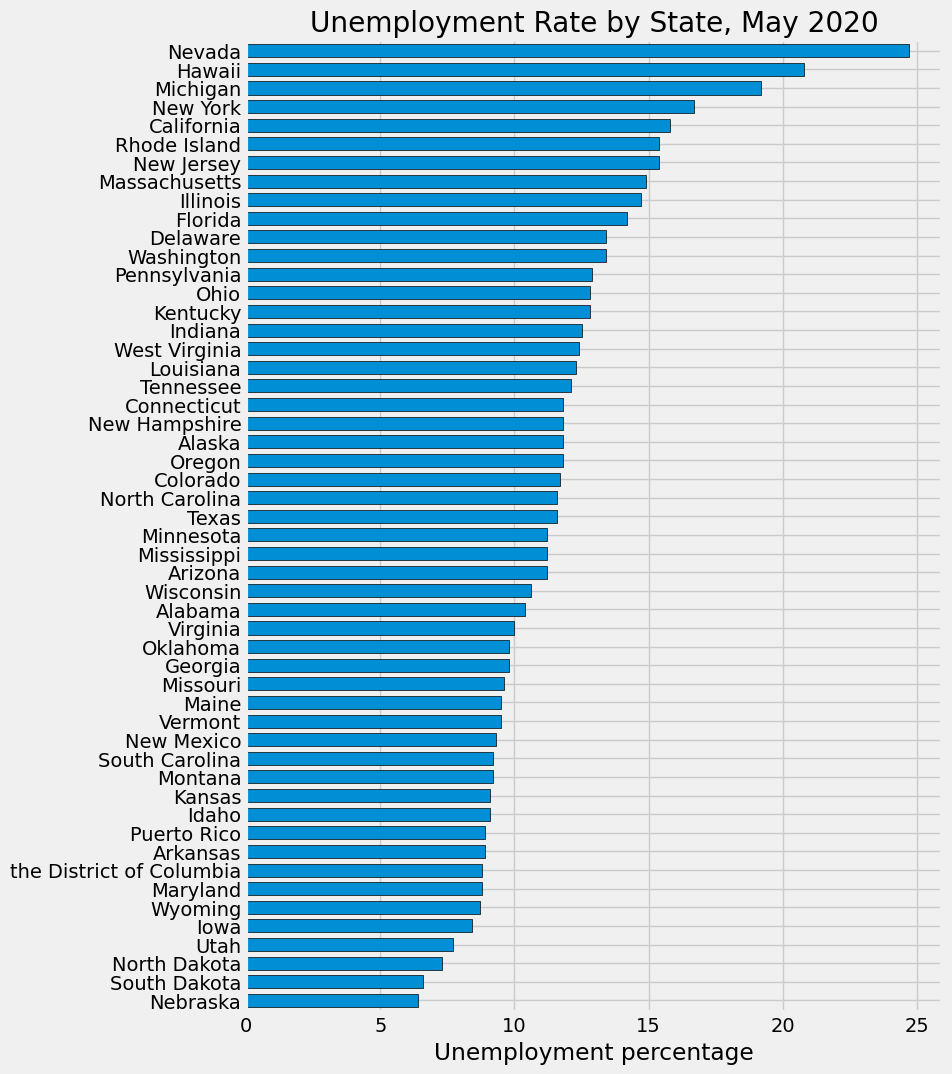

In [56]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('Unemployment percentage')
plt.show()

## Pulling participation rate


In [57]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [60]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) 
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

## Unemployment vs Participation for each state!

In [63]:
# fixing DC
unemp_states = unemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})


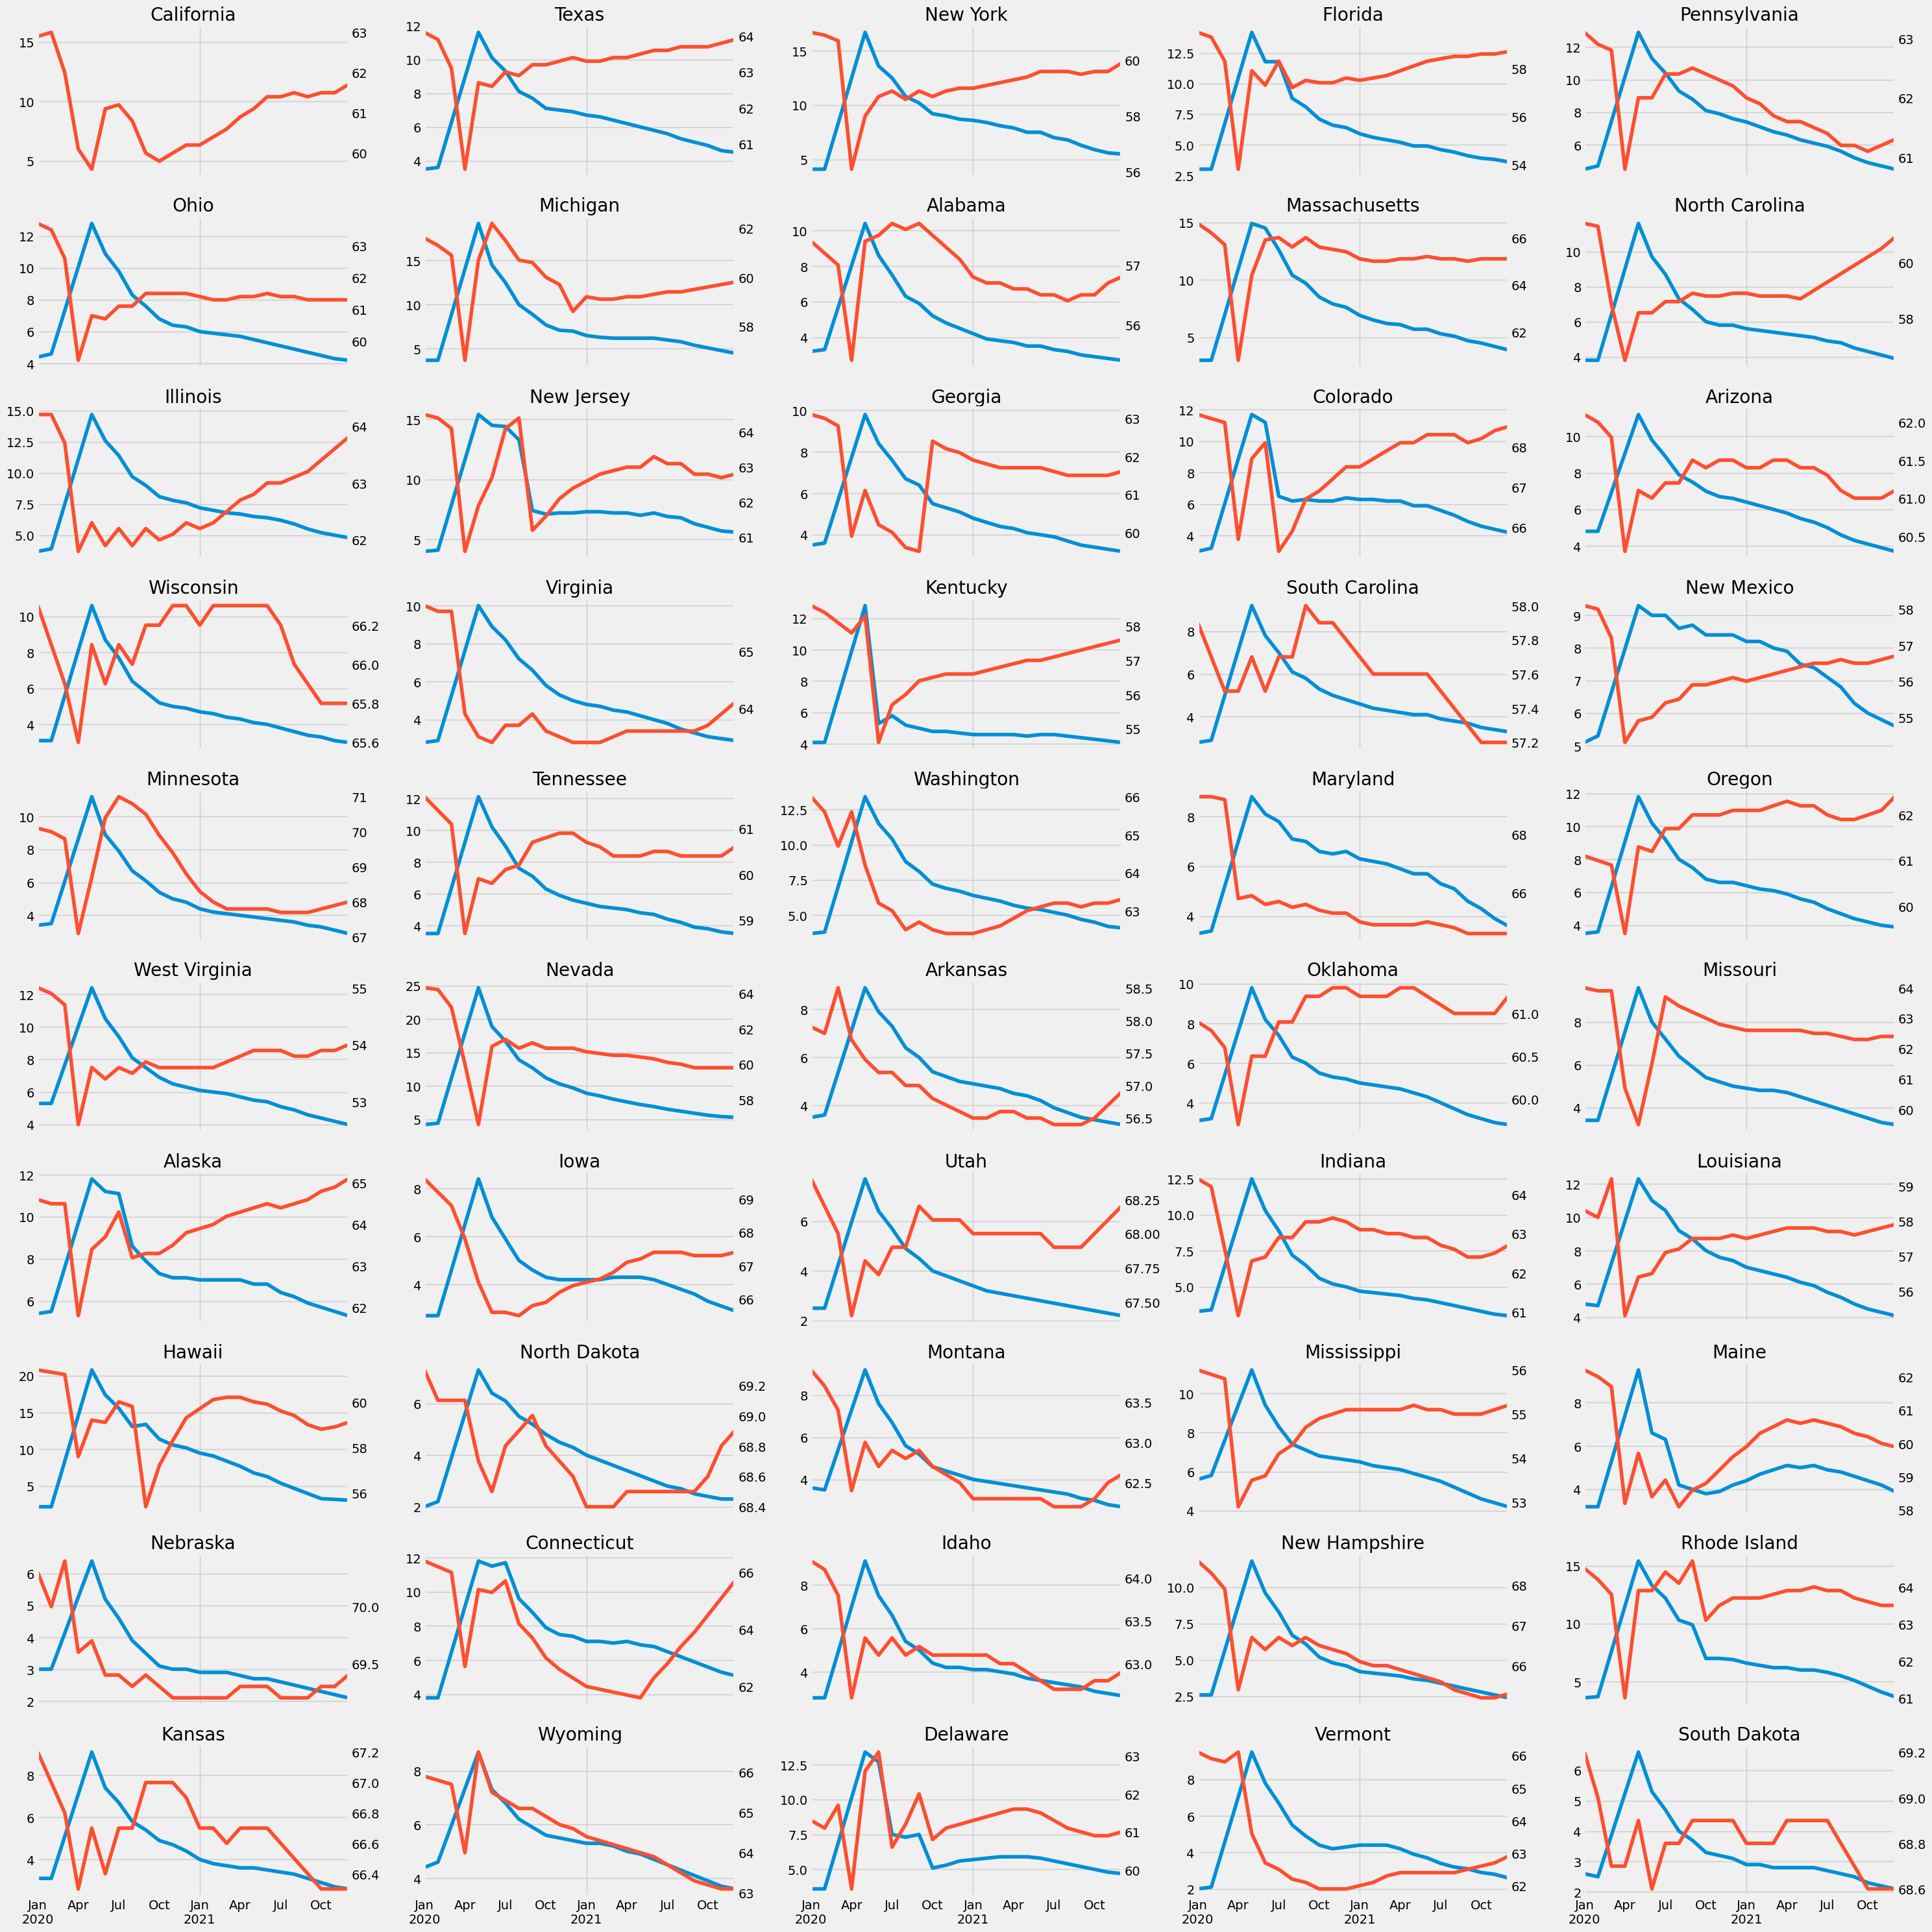

In [66]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()